In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
sigma, mu, N = 1, 0, 100

# Тестируемые параметры априорных распределений
prioriParameters1 = [(0, 1), (0, 100), (10, 1), (10, 100)]
prioriParameters2 = [(1, 1), (1, 100), (10, 1), (10, 100)]

values = np.random.normal(mu, sigma, N)

In [3]:
class Evaluation:
    def __init__(self, data, name, real):
        self.name = name
        self.data = np.array(data)
        self.real = real
        
    def plot(self, maxY):
        axis.plot (np.abs(self.data - self.real), label=r"{}".format(self.name))
        axis.legend(loc="upper left")
        axis.set_xlabel("n")
        axis.set_ylabel(r"Evaluations")
        axis.set_ylim(0, maxY)
        axis.set_title(r"Evaluations")

Рассмотрим модель $N(\theta, 1)$

Оценка максимального правдоподобия для $\theta$ это $\bar{X}$

Если априорное распределение это $N(b, \sigma^2)$, то байессовской оценкой $\theta$ является $\frac{b + \sigma^2\sum_{i=1}^{n}x_i}{1 + n\sigma^2}$

In [4]:
# Считаем оценки

muEvaluations = []

muEvaluations.append(Evaluation([values[:n + 1].mean() for n in range(N)], "MMP", mu))
for priori in prioriParameters1:
    muEvaluations.append(Evaluation(
        [(priori[0] + priori[1] * np.sum(values[:n + 1])) / (1 + n * priori[1]) for n in range(N)],
        "Priori $N({}, {})$".format(priori[0], priori[1]),
        mu
    ))

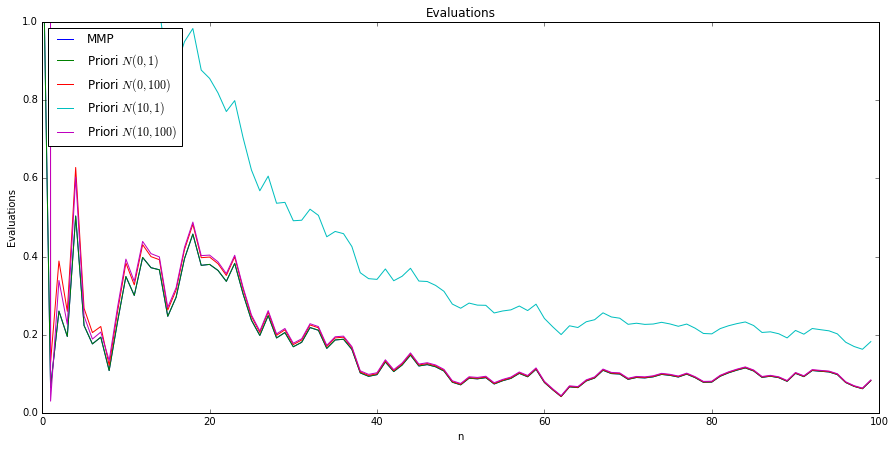

In [5]:
# Строим графики абсолютных величин отклонений

figure = plt.figure(figsize=(15,7))
axis = figure.add_subplot(1, 1, 1)
for evaluation in muEvaluations:
    evaluation.plot(1)

Баесовская оценка практически одинаковая почти для всех параметров. Они так же совпадает с оценкой максимального правдоподобия. Это можно понять из формулы для оценки. При больших $n$ параметры априорного распределения в формуле сокращаются и баессовская оценка становится близкой к оценке максимального правдоподобия. Выделяющийся набор параметров $(10, 1)$ имеет большее значение $b$ при небольшом $\sigma^2$, поэтому он не совпадает с оценкой максимального правдоподобия при наших $n$.

Теперь рассмотрим модель $N(0, \theta)$

Оценкой максимального правдоподобия в такой модели является выборочная дисперсия $S_n^2 = \frac{1}{n}\sum_{i=1}^{n}(X_i-\bar{X})^2 = \frac{1}{n}\sum_{i=1}^{n}X_i^2-(\frac{1}{n}\sum_{i=1}^{n}X_i)^2$

В качестве сопряженного распределения возмем обратное гамма распределение. Тогда байессовской оценкой $\theta$ является $\frac{\lambda+\frac{1}{2}\sum_{i=1}^{n}X_i^2}{\alpha+\frac{n}{2}-1}$

In [6]:
sigmaEvaluations = []

sigmaEvaluations.append(Evaluation(
        [np.sum([value ** 2 for value in values[:n]]) / n - (np.sum([value for value in values[:n]]) / n) ** 2
         for n in range(1, N + 1)],
        "MMP",
        sigma
    ))
for priori in prioriParameters2:
    sigmaEvaluations.append(Evaluation([
            (priori[1] + np.sum(value ** 2 for value in values[:n]) / 2) / (priori[0] + n / 2 - 1)
            for n in range(1, N + 1)
        ],
        r"Priori $\alpha={}, \lambda={}$".format(priori[0], priori[1]),
        sigma
    ))

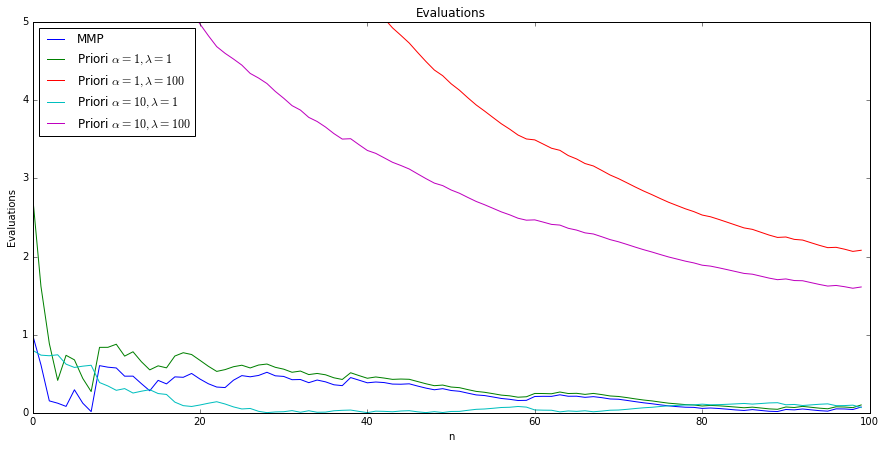

In [7]:
# Строим графики абсолютных величин

figure = plt.figure(figsize=(15,7))
axis = figure.add_subplot(1, 1, 1)
for evaluation in sigmaEvaluations:
    evaluation.plot(5)

Здесь отличия между оценками с разными параметрами больше. Можно убедиться в том, что важдно правильно выбирать эти параметры. В нашем случае самой близкой к оценке максимального правдоподобия будет оценка с параметрами $\alpha = \lambda = 1$. Оценка с параметрами $\alpha = 10, \lambda = 1$ так же достаточно хороша.